<a href="https://colab.research.google.com/github/curisuchian/PythonIntegral/blob/main/Convolucion_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Este notebook tiene como objetivo presentar herramientas libres y de fácil acceso a los alumnos de Ingeniería en Electrónica. A través del lenguaje Python, y sus librerías, es posible trabajar con señales y realizar un análisis espectral.

Aclaración: la presentación de la FFT y el espectograma pretende motivar  al estudiante el estudio de los tópicos de la asignatura.

## Google Colab

Google Colab es una herramienta gratuita basada en la nube que permite a los usuarios escribir, ejecutar y colaborar en código de Python (aunque también soporta R). Colab es una abreviatura de "Colaboratory" y es una iniciativa de Google Research.

Proporciona acceso a un entorno de [notebook de Jupyter](https://es.wikipedia.org/wiki/Proyecto_Jupyter) que se ejecuta completamente en la nube y no requiere configuración en el equipo local. Los usuarios pueden escribir y ejecutar código Python, cargar y descargar datos, crear gráficos y visualizaciones, y colaborar con otros usuarios en tiempo real. Colab también permite a los usuarios aprovechar el poder de procesamiento de las GPUs de Google de forma gratuita, lo que permite la aceleración de cálculos intensivos en datos.

Además, se integra con servicios populares como Google Drive y GitHub, lo que facilita la gestión de proyectos de colaboración y el acceso a datos y código de forma segura y eficiente.

[Breve tutorial para principiantes](https://www.youtube.com/watch?v=8VFYs3Ot_aA)

## Librerías utilizadas


### Numpy

Es una libería de Python que se utiliza principalmente para el cálculo numérico y científico.

Proporciona un objeto de matriz n-dimensional, que es una estructura de datos eficiente para almacenar y manipular grandes conjuntos de datos numéricos.

### Matplotlib

Es una librería de gráficos en 2D de Python que permite crear visualizaciones de alta calidad y personalizables.

Matplotlib se puede utilizar para crear gráficos de líneas, gráficos de dispersión, histogramas, diagramas de barras, gráficos de torta, diagramas de caja y bigotes, gráficos de contorno, gráficos de superficie, mapas de calor y muchos otros tipos de visualizaciones.

###Importación de dependencias


Se importan las liberías y se realizan algunas configuraciones previas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8] # define un tamaño predeterminado para las gráficas
plt.rcParams.update({'font.size' : 14})

# Generalidades de las señales



Una señal es una función que representa una variable o cantidad física que contiene algún tipo de información acerca del comportamiento o naturaleza de un fenómeno

## Tipos de señales

Tiempo continuo:

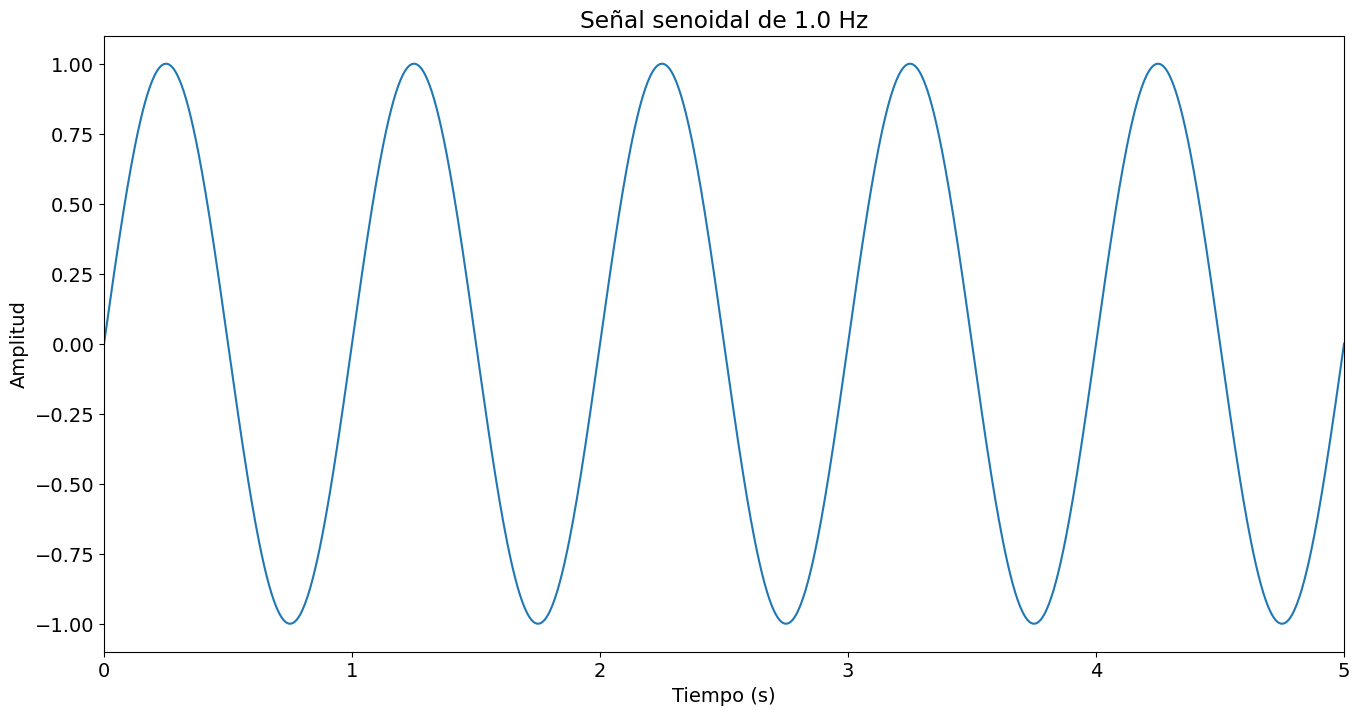

In [6]:
# Parámetros de la señal
A = 1.0  # amplitud
f = 1.0  # frecuencia
phi = 0  # fase

# Generar una secuencia de valores de tiempo de 0 a 5 segundos
t = np.linspace(0, 5, 1000)

# Calcular los valores de la función seno para cada valor de tiempo
x = A * np.sin(2*np.pi*f*t + phi)

# Graficar la señal generada
plt.plot(t, x)
plt.xlim(t[0],t[-1])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title(f'Señal senoidal de {f} Hz')

plt.xticks(np.arange(0, 6, 1))

plt.show()


Tiempo discreto:

<ipython-input-3-0a28749e367c>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x, use_line_collection=True)


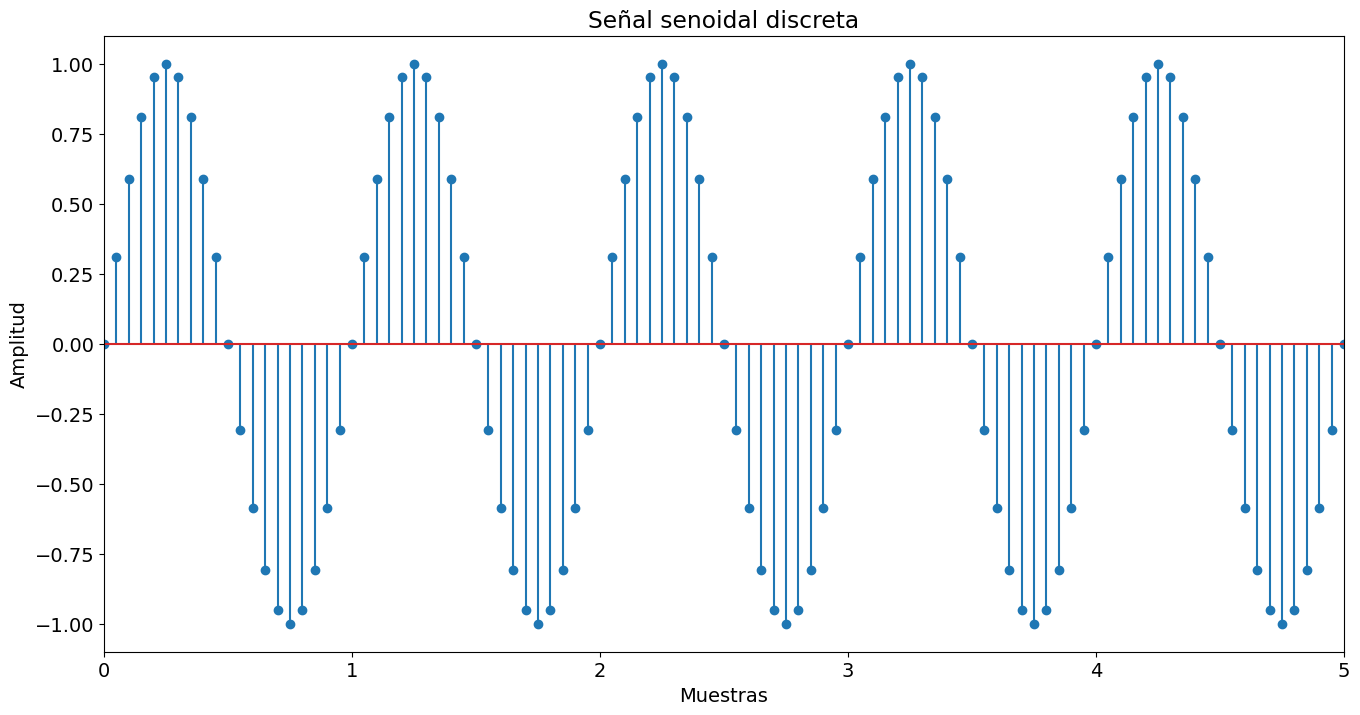

In [3]:
# Parámetros de la señal
A = 1.0  # amplitud
f = 1.0  # frecuencia
phi = 0  # fase

# Generar una secuencia de valores de 0 a 5 segundos
n = np.linspace(0, 5, 101)

# Calcular los valores de la función seno para cada valor de tiempo
x = A * np.sin(2*np.pi*f*n + phi)

# Graficar la señal generada
plt.stem(n, x, use_line_collection=True)
plt.xlim(n[0],n[-1])
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title(f'Señal senoidal discreta')

plt.xticks(np.arange(0, 6, 1))

plt.show()


Además, podemos clasicarlas como:

* Reales y complejas ⟹ $x(t)= x_{1}(t) + jx_{2}(t)$

* Determinísticas ⟹ $x(t)= 2cos(\omega t)$

* Aleatorias ⟹ $x(t)= ?$

Ejemplo de señal aleatoria:

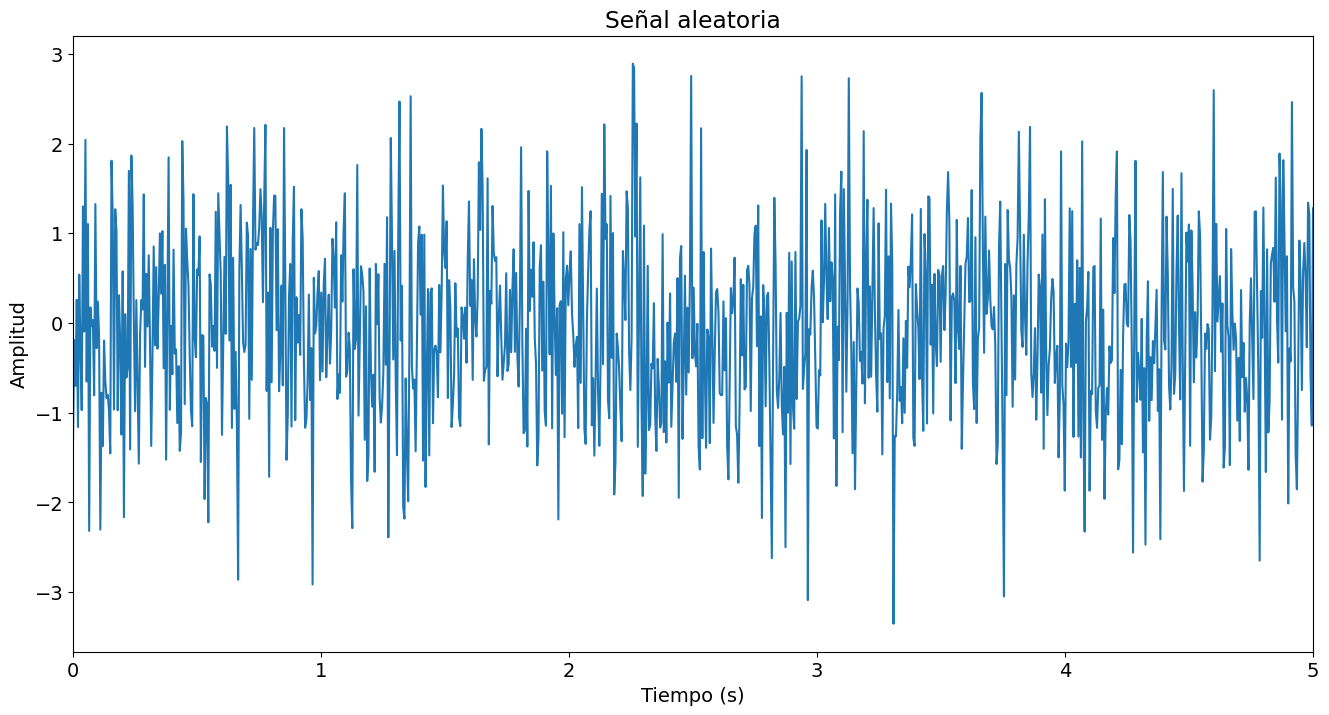

In [10]:
# Parámetros de la señal
A = 1.0  # amplitud
f = 1.0  # frecuencia
phi = 0  # fase

# Generar una secuencia de valores de tiempo de 0 a 5 segundos
t = np.linspace(0, 5, 1000)

# Calcular los valores de la función seno para cada valor de tiempo
x = np.random.normal(0, 1, len(t))

# Graficar la señal generada
plt.plot(t, x)
plt.xlim(t[0],t[-1])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title(f'Señal aleatoria')

plt.xticks(np.arange(0, 6, 1))

plt.show()


# Análisis frecuencial

## ¿Por qué estudiar las señales en el dominio de la frecuencia?

El análisis de señales en el dominio de la frecuencia es importante por varias razones:

* **Identificación de componentes frecuenciales**: Al analizar una señal en el dominio de la frecuencia, podemos identificar las diferentes componentes frecuenciales que la componen. Esto puede ser útil para identificar patrones, tendencias o comportamientos específicos de la señal.

* **Filtrado de señales**: En algunos casos, puede ser necesario eliminar o atenuar ciertas componentes frecuenciales de una señal. Al analizar la señal en el dominio de la frecuencia, podemos aplicar técnicas de filtrado que permiten eliminar o atenuar componentes específicas de la señal.

* **Compresión de datos**: En algunos casos, las señales pueden tener una gran cantidad de información redundante o innecesaria. Al analizar la señal en el dominio de la frecuencia, podemos aplicar técnicas de compresión de datos que permiten reducir el tamaño de la señal sin perder información crítica.

* **Reconocimiento de patrones**: El análisis de señales en el dominio de la frecuencia es común en aplicaciones de reconocimiento de patrones y clasificación de señales. Al analizar las diferentes componentes frecuenciales de una señal, podemos identificar patrones o características específicas que son relevantes para la clasificación o el reconocimiento de la señal.

## Herramientas

A lo largo de la asignatura se conocerán las siguientes herramientas matématicas que nos permitirán transformar las señales desde el dominio temporal al frecuencial (y viceversa):
* **Serie de Fourier de Tiempo Continuo** (para señales continuas y periódicas)
* **Transformada de Fourier en Tiempo Continuo** (para señales continuas No periódicas)
* **Serie de Fourier de Tiempo Discreto** (para señales discretas y periódicas)
* **Transformada de Fourier de Tiempo Discreto** (para señales discretas y No periódicas)


Dichas herramientas nos permiten comprender los fundamentos que subyacen al análisis espectral, sin embargo, en la pŕactica se utiliza la FFT y espectogramas.

### ¿Qué es la FFT?

* La "Fast Fourier Transform" (Transformada Rápida de Fourier), es un **algoritmo utilizado para calcular la Transformada de Fourier** de una señal.
* Es una herramienta matemática que permite descomponer una señal en sus diferentes componentes de frecuencia.

### ¿Qué son los Espectogramas?

* Es una **representación gráfica de la señal en el dominio del tiempo y la frecuencia**. Es una forma de visualizar cómo cambia la energía de una señal a lo largo del tiempo y en diferentes frecuencias.

* Se crea mediante la transformada de Fourier. Esta divide la señal en segmentos más cortos y aplica la transformada de Fourier a cada segmento para obtener la distribución de energía de la señal en diferentes frecuencias.

* El espectrograma **muestra la intensidad o energía de la señal en diferentes frecuencias a lo largo del tiempo**. Normalmente, se utiliza una escala de colores para representar la intensidad de la señal, donde los tonos más oscuros representan menor intensidad y los tonos más claros representan mayor intensidad.

* Son útiles para analizar señales que cambian en el tiempo, como señales de voz, música o señales de vibración. Permiten identificar patrones, cambios y tendencias en la señal a lo largo del tiempo y en diferentes frecuencias. Además, utilizan en aplicaciones de procesamiento de señales, como el filtrado de señales o la compresión de datos.

##Ejemplo básico de aplicación: Filtrado de señales con FFT

Este ejemplo consiste en la construcción de una señal con ruido. Se calcula su espectro frecuencial y se filtra dicho ruido a través de la densidad espectral.

###Creación de las señales

Se crean dos señales de 50 y 200 Hz. Para generar una señal compuesta por ambas.


In [11]:
Ts = 0.001                                       # Se define un tiempo de muestreo
Fs=1/Ts                                          # Se define una frecuencia de muestreo

print(f"Frecuencia de muestreo: {Fs} [Hz]")

Frecuencia de muestreo: 1000.0 [Hz]


In [12]:
w1 = 2*np.pi*50                                  # Se define una frecuencia de 50 Hz para la señal 1
w2 = 2*np.pi*200                                 # Se define una frecuencia de 120 Hz para la señal 2

n = Ts*np.arange(0, 1000)
N = len(n)                                       # N es la cantidad de muestras
x = np.sin(w1*n) + np.sin(w2*n)                  # Se construye la señal compuesta



Luego, a esta última señal se compuesta se agrega ruido.

In [13]:
ruido = 1.0 * np.random.randn(N)           # Se adiciona ruido a la señal compuesta
x_ruido = x + ruido

###Gráfica señal vs señal con ruido

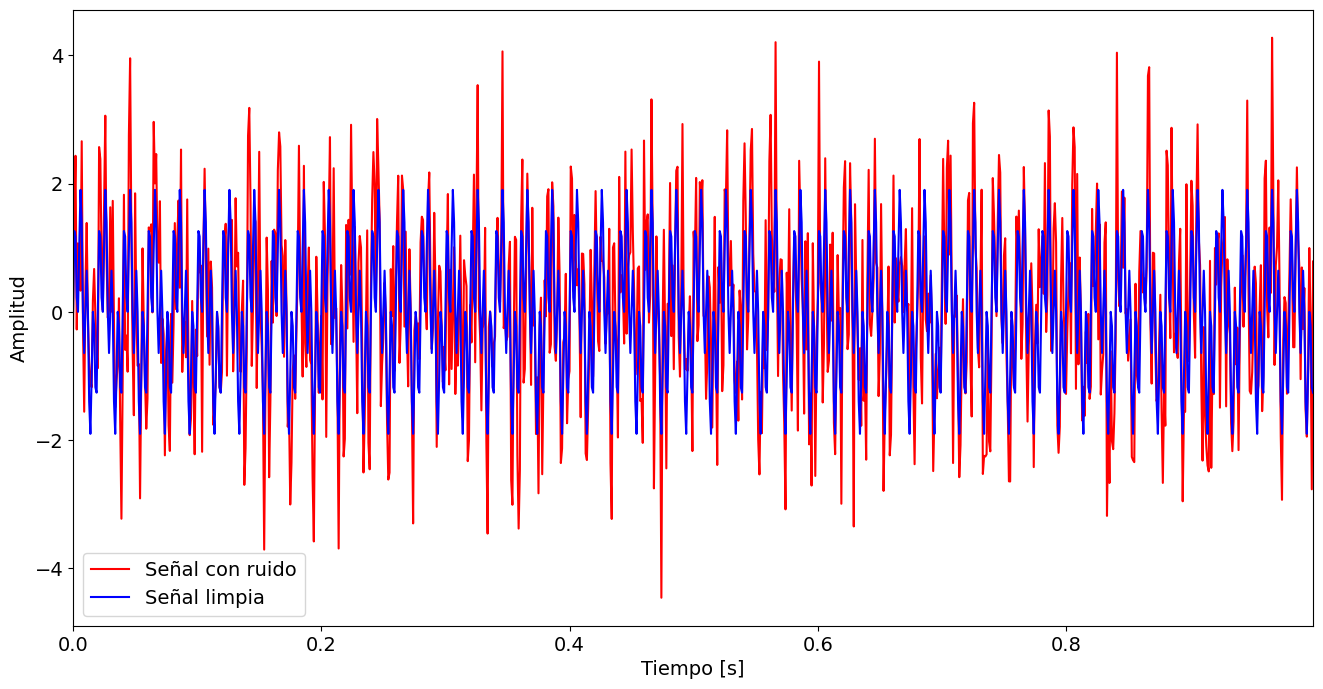

In [19]:
plt.plot(n,x_ruido,color='r',lw=1.5,label='Señal con ruido')
plt.plot(n,x,color='b',lw=1.5,label='Señal limpia')
plt.xlim(n[0],n[-1])
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

###Cómputo de la FFT

In [24]:
X_FFT = np.fft.fft(x_ruido, N)               # Se calcula la FFT. El segundo parámetro corresponde al tamaño de la salida
mag_X = abs(X_FFT)                           # Se calcula la Magnitud de la FFT

Para crear el vector de frecuencias, para luego graficar, hay que tener en cuenta que cada valor obtenido con la FFT, corresponde a la frecuencia dada por la siguiente expresión: $$f_{k} = k * \frac{F_{s}}{N}$$

In [22]:
freq = Fs*np.arange(0, N)/N                  # Se define el vector de frecuencias

###Espectro de la señal

In [20]:
L = np.arange(0, np.floor(N/2), dtype='int')    # Para plotear la primera mitad del espectro

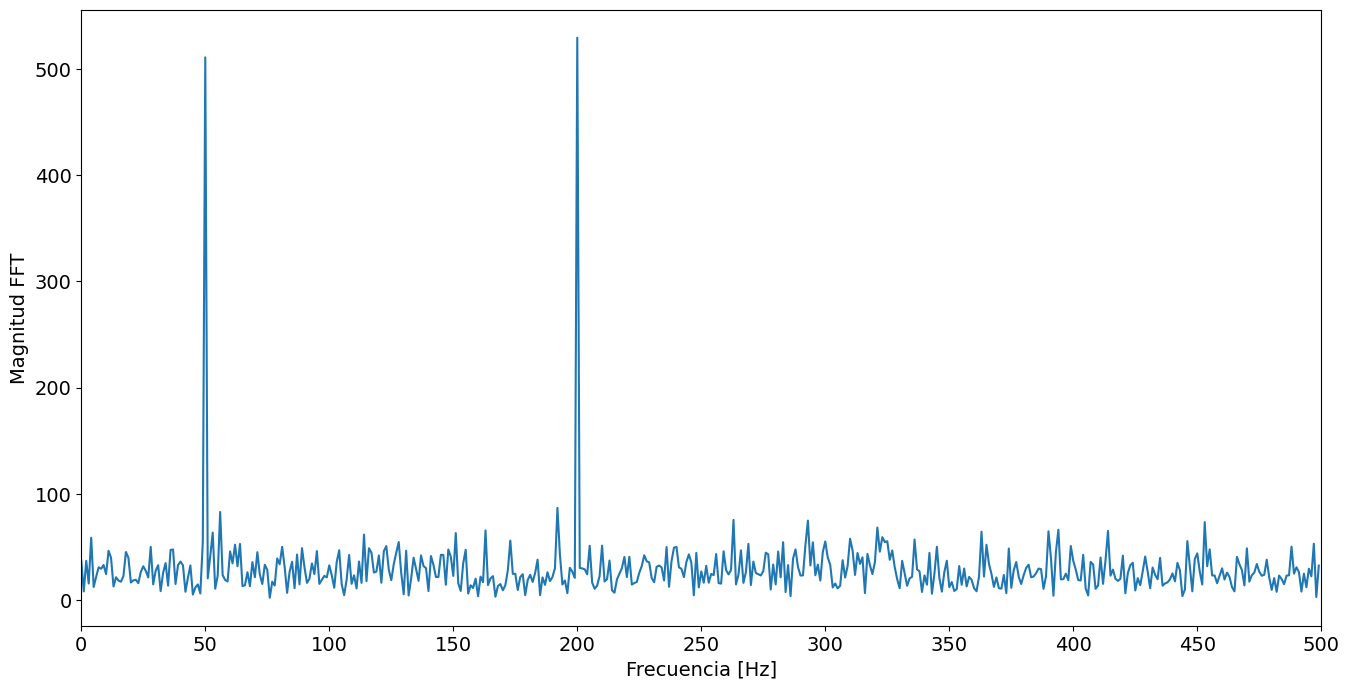

In [25]:
plt.plot(freq[L], mag_X[L])
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.ylabel('Magnitud FFT', fontsize='14')
plt.xlim(freq[L[0]],freq[L[-1]])

plt.xticks(np.arange(0, 501, 50))
plt.show()

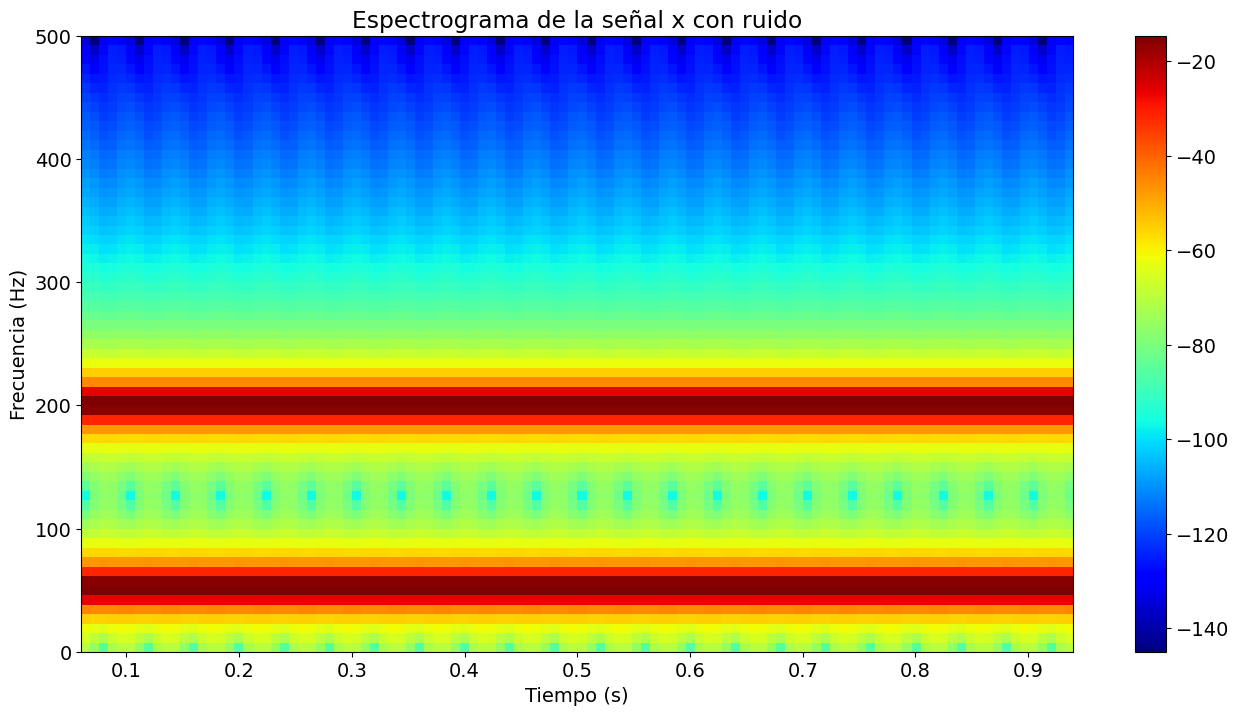

In [13]:
# @title Espectrograma de la señal x con ruido
# Calcular el espectrograma de la señal generada
plt.specgram(x, Fs=Fs, NFFT=128, noverlap=120, cmap='jet')
plt.colorbar()

# Agregar etiquetas de ejes y título
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de la señal x con ruido')
#plt.ylim(0,300)

# Mostrar el espectrograma
plt.show()

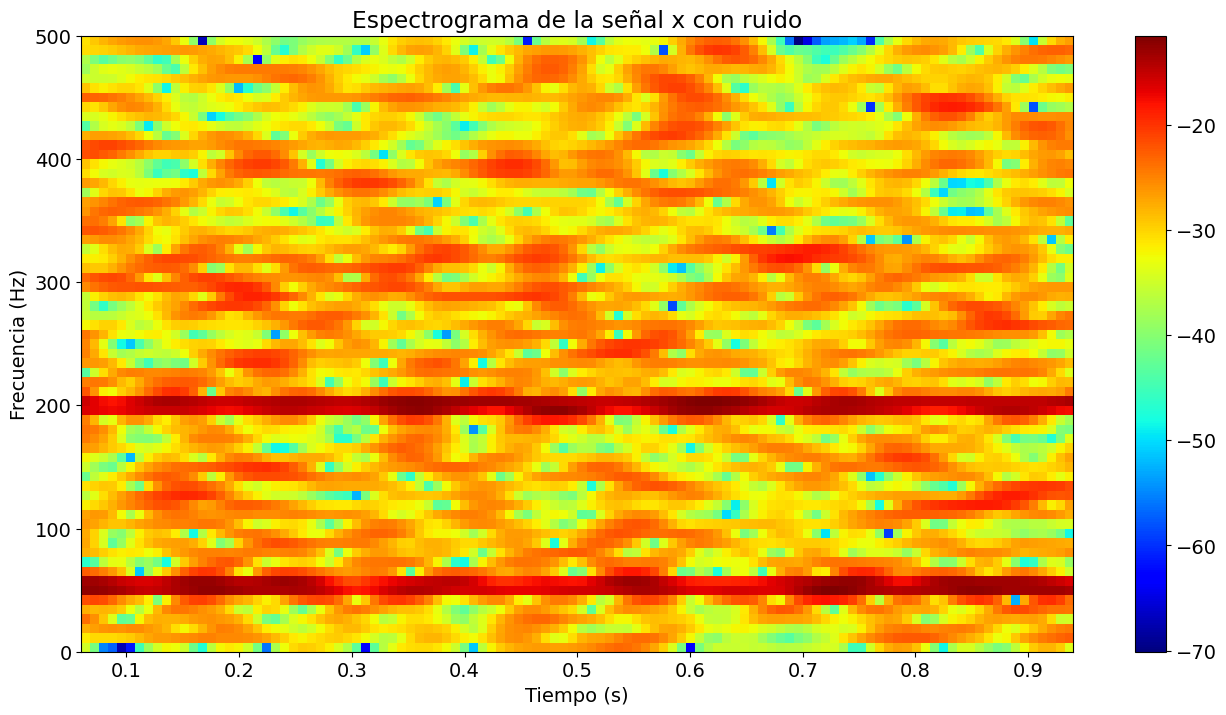

In [26]:
# @title Espectrograma de la señal x con ruido
# Calcular el espectrograma de la señal generada
plt.specgram(x_ruido, Fs=Fs, NFFT=128, noverlap=120, cmap='jet')
plt.colorbar()

# Agregar etiquetas de ejes y título
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de la señal x con ruido')
#plt.ylim(0,300)

# Mostrar el espectrograma
plt.show()

Explicación de los parámetros utilizados en el método de `specgram()`:
* `x_ruido`: La señal de audio en formato de un array NumPy.
* `Fs`: La tasa de muestreo de la señal de audio en Hz.
* `NFFT`: El número de puntos de la Transformada de Fourier de la señal de audio. A mayor número de puntos, mejor será la resolución en frecuencia, pero menor será la resolución en tiempo.
* `noverlap`: La cantidad de puntos que se superponen entre las ventanas consecutivas de la Transformada de Fourier. A menor cantidad de puntos, mayor será la cantidad de ventanas que se pueden generar y mejor será la resolución en tiempo, pero menor será la resolución en frecuencia.
* `cmap`: El mapa de colores que se utilizará para mostrar el espectrograma.


###PSD

In [15]:
PSD = X_FFT * np.conj(X_FFT) / N                 # Densidad espectral de potencia (Power spectrum, power per frecuency)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


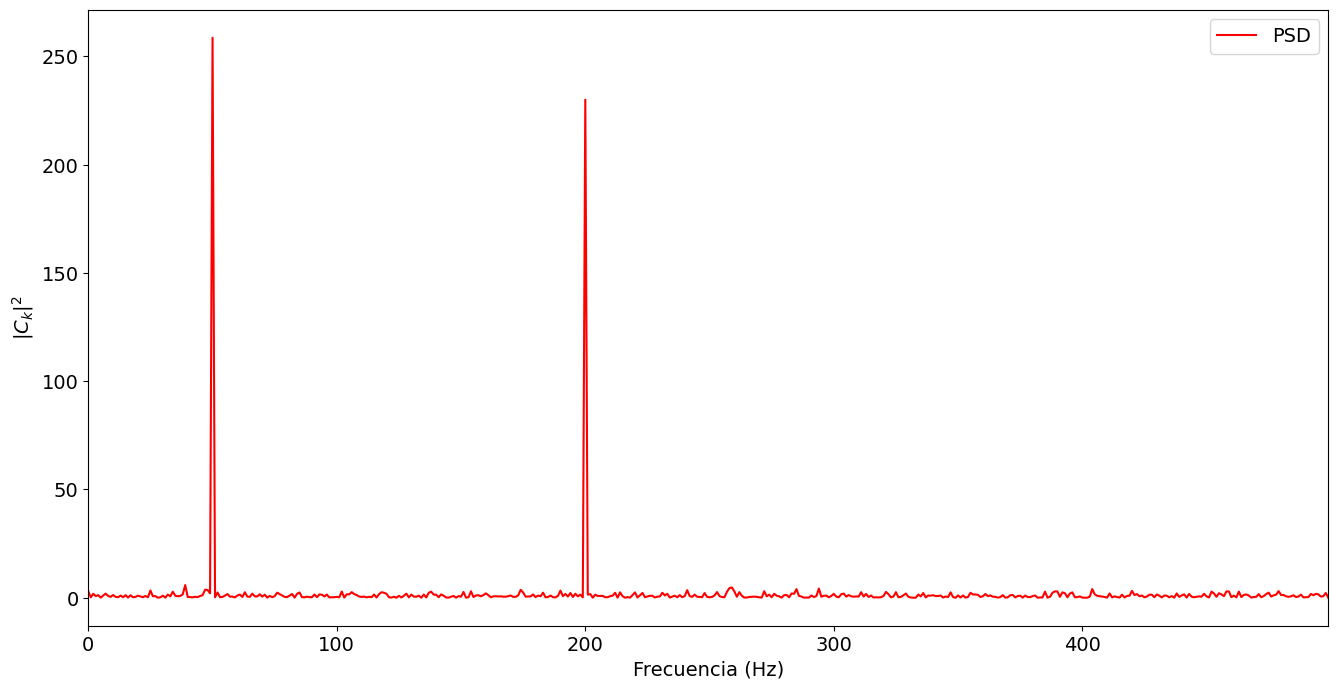

In [16]:
plt.plot(freq[L],PSD[L],color='r',lw=1.5,label='PSD')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$|C_{k}|^{2}$')
plt.legend()
plt.show()

Filtrado a través de la PSD

In [17]:
umbral = 100
indices = PSD > umbral               # Arroja las potencias superiores al umbral arbitrario

PSD_filtrado = PSD * indices         # Hace cero a las menores que el umbral en el PSD
X_FFT = indices * X_FFT              # Hace cero a los correspondientes en los coeficientes de Fourier

x_filtrada = np.fft.ifft(X_FFT)      # FFT inversa para filtrar la señal de tiempo

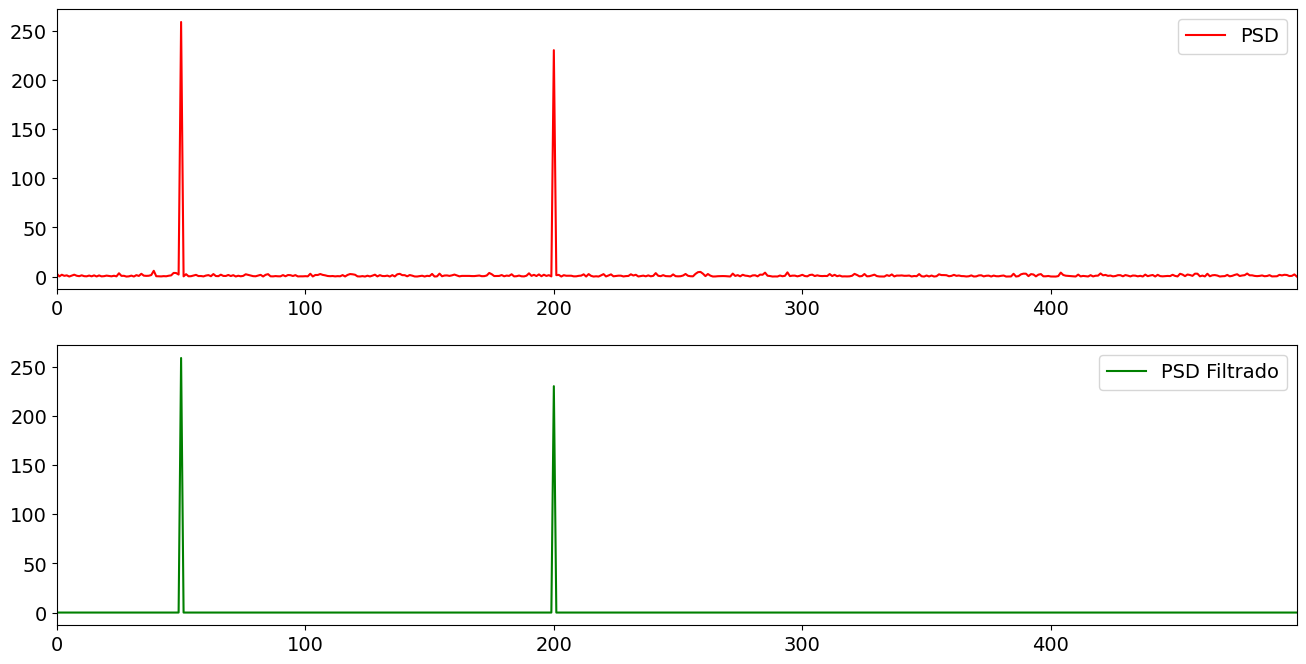

In [18]:
# @title PSD filtrado
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(freq[L],PSD[L],color='r',lw=1.5,label='PSD')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD_filtrado[L],color='g',lw=1.5,label='PSD Filtrado')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

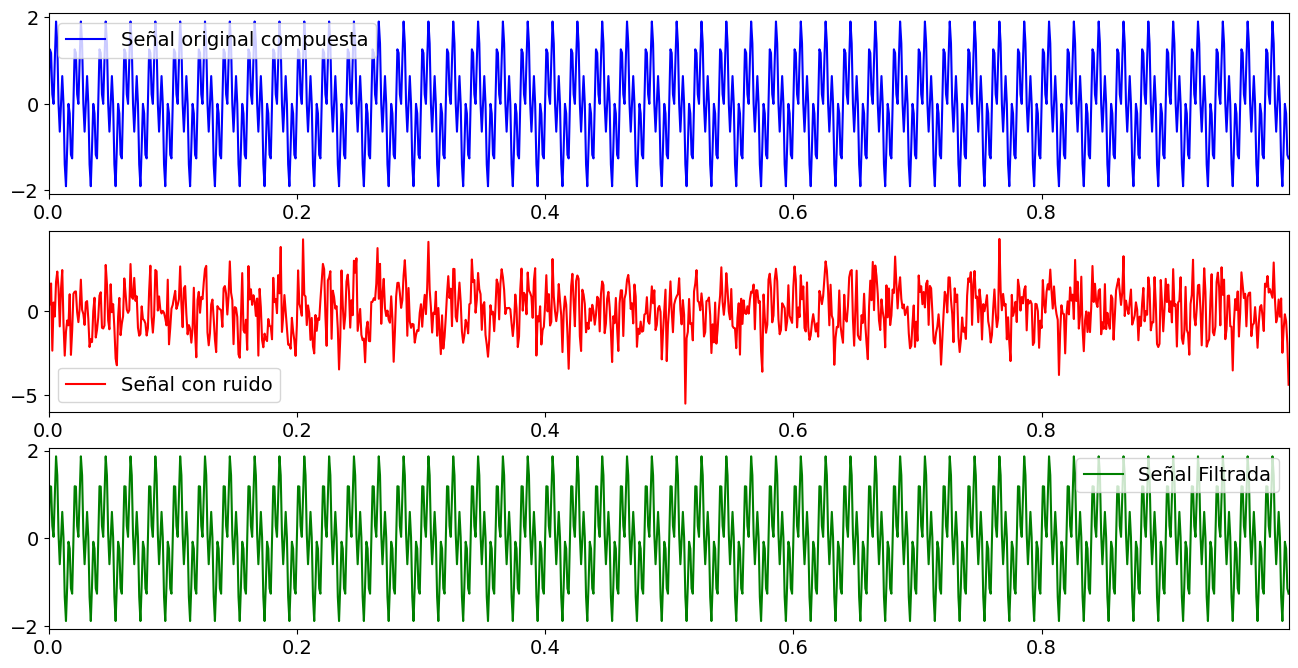

In [19]:
# @title Comparación de señales (original, con ruido y filtrada)
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(n,x, color='b', lw=1.5, label='Señal original compuesta')
plt.xlim(n[0],n[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(n,x_ruido, color='r', lw=1.5, label='Señal con ruido')
plt.xlim(n[0],n[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(n,x_filtrada, color='g', lw=1.5, label='Señal Filtrada')
plt.xlim(n[0],n[-1])
plt.legend()

plt.show()

- - -
Ingeniería electrónica
- - -
ET343 Señales y Sistemas
- - -
Autor: Rodriguez, Mariano David.